In [96]:
numbers = [10, 20, 30, 40, 50]
sum = 0
for i in range(len(numbers)):
    sum = sum + numbers[i]
average = sum / len(numbers)
print("Average is: " , average)
if average > 25:
    print("Above average")
else:
    print("Below average")
    
    
    

Average is:  30.0
Above average


In [102]:
import numpy as np
def ComputeKE(m,v):
    ans = 0.5 * m * v ** 2 #Indentation, 4 white space 
    return ans
mass = numpy.array([1.1,2.1,3.1])
velocity = numpy.array([0.5,4.3,5.1])
KE = ComputeKE(mass, velocity)
print ("KE are %.3f J,%.3f J, %.3f J "%(KE[0],KE[1],KE[2]))

KE are 0.138 J,19.415 J, 40.316 J 


In [98]:
import numpy
N = 100000
inside = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    pos = (x,y)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside.append(pos)
MC_pi = len(inside)/float(N) * 4.
print ("The pi value estimated in MC simulations = %8.5f" %MC_pi )

The pi value estimated in MC simulations =  3.13888


In [100]:
#(a)
sum = 0.
for i in range(100):
    sum += 1.23
diff = 123. - sum
print ("difference = ", diff)
#----------
#(b)
sum = 0.
for i in range(1000):
    sum += 0.125
diff = 125. - sum
print ("difference = ", diff)

difference =  -1.1368683772161603e-13
difference =  0.0


In [101]:
def LCG(a,c,M,r):
    ans = (a * r + c) % M
    return ans
r = 3
R_Data =[r]
for i in range(10):
    a,c,M = 4,1,9
    r = LCG(a,c,M,r)
    R_Data.append(r)
print (R_Data)

[3, 4, 8, 6, 7, 2, 0, 1, 5, 3, 4]


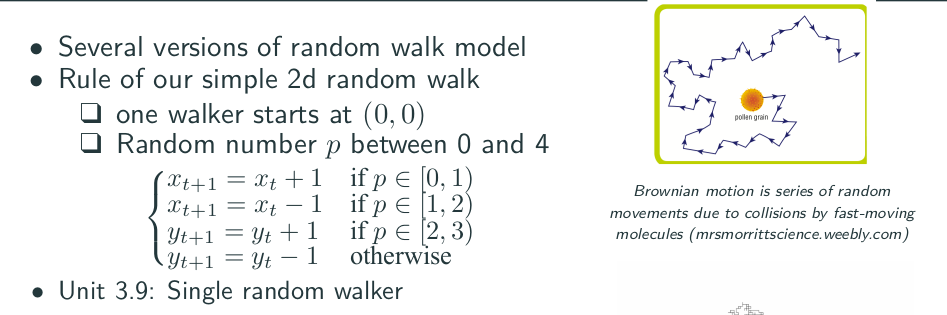

In [103]:
import numpy as np
import matplotlib.pyplot as plt

n_step = 100000
p_array = np.random.uniform(0,4,n_step) 

time_array = range(0,n_step+1) 
x_array = np.zeros(n_step+1)
y_array = np.zeros(n_step+1)
iter_num = 0
for p_val in p_array:
    iter_num += 1
    if p_val < 1.8: # move right
        x_array[iter_num] = x_array[iter_num-1] + 1
        y_array[iter_num] = y_array[iter_num-1]
    elif p_val<2: #move left
        x_array[iter_num] = x_array[iter_num-1] - 1
        y_array[iter_num] = y_array[iter_num-1]
    elif p_val < 3:#move up
        x_array[iter_num] = x_array[iter_num-1] 
        y_array[iter_num] = y_array[iter_num-1]+ 1
    else:#move down
        x_array[iter_num] = x_array[iter_num-1] 
        y_array[iter_num] = y_array[iter_num-1]- 1
        
#print (x,y)
print (x_array)
print (y_array)
print (time_array)    

print ("okay")

[0.0000e+00 0.0000e+00 1.0000e+00 ... 4.0028e+04 4.0029e+04 4.0030e+04]
[  0.  -1.  -1. ... 124. 124. 124.]
range(0, 100001)
okay


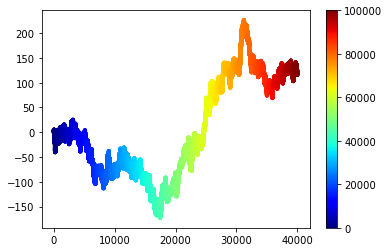

In [104]:
plt.scatter(x_array, y_array, c=time_array, cmap='jet', s= 10)
plt.clim(0,n_step)
clb = plt.colorbar()

In [65]:
print (x_array)

[0. 0. 0. ... 0. 0. 0.]


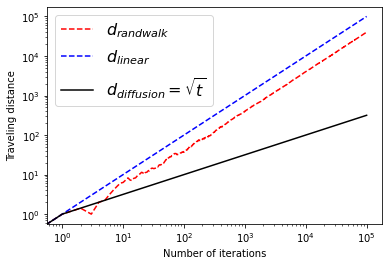

In [105]:

dis_array = ((x_array - x_array[0])**2.+(y_array - y_array[0])**2.)**0.5
plt.loglog(time_array, dis_array,'r--', label = r'$d_{randwalk}$')
plt.loglog(time_array, time_array,'b--', label = r'$d_{linear}$')
plt.loglog(time_array, np.sqrt(time_array),'k-', label = r'$d_{diffusion}=\sqrt{t}$')
plt.xlabel("Number of iterations")
plt.ylabel("Traveling distance")
plt.legend(loc="upper left", fontsize = 16, numpoints=1)


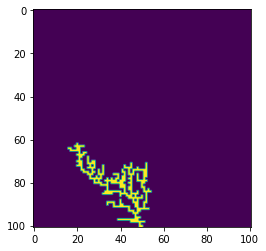

In [15]:

from random import choice
import numpy as np
import matplotlib.pyplot as plt


# Initilization
n_part = 300 # Number of particles to aggregate
side= 101  # Should be an odd number
steps = [(1,0),(1,0),(1,0),(1,0),(1,0),
         (1,0),(0,1),(0,1)]
DLA_domain = np.zeros((side, side))
DLA_domain[side-1][side//2] = 1 # place a seed at center 

#==

for ipart in range(n_part):
    # Start a random walker at origin
    x,y = 0,0
    # perform the random walk until particle aggregates
    dla_swtich = True # True: continue dla process, False: stop
    while dla_swtich: # while condition.
        DLA_domain[x][y] = 0 #Remove particle from current spot
        
        #part 1: diffusion in liquid
        #=====Randomly move particle
        sx,sy = choice(steps)
        x += sx
        y += sy
        
        
        # part 2, if move outside the box
        # Enforce periodic boundaries
        if x < 0: x = side - 1 #left wall
        if y < 0: y = side - 1 # bottom wall
        if x == side: x = 0 # right wall
        if y == side: y = 0 # top wall
        DLA_domain[x][y] = 1 #Put particle in new location
        
        
        

        # part 3, if meet a solid (i.e. neighbor has value of 1, yellow color)
        # The walker stops when seeing a neighbor
        if (DLA_domain[(x+1)%side][y]
            +DLA_domain[x][(y+1)%side]
            +DLA_domain[(x+side-1)%side][y]
            +DLA_domain[x][(y+side-1)%side])>0:
            dla_swtich = False #The walker stops when seeing a neighbor 
plt.imshow(DLA_domain)
plt.savefig('Unit3.11_DLA.png')








In [112]:
steps = [(1,0),(-1,0),(0,1),(0,-1)]
sx,sy = choice(steps)
print (sx,sy)

-0.01 0


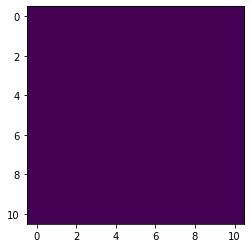

In [127]:
DLA_domain = np.zeros((11, 11))
#print (DLA_domain)
plt.imshow(DLA_domain)


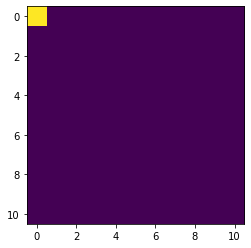

In [128]:
DLA_domain[0][0] = 1 # place a seed at center 
#print (DLA_domain)
plt.imshow(DLA_domain)

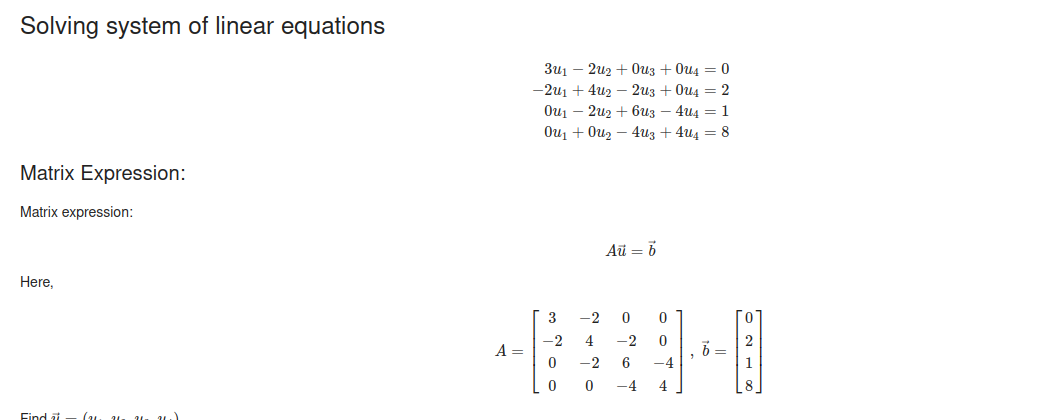

In [18]:
import numpy as np
A = np.array([[ 3., -2., 0.,  0.],
              [-2., 4., -2.,  0.],
              [ 0.,  -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

print (A)

b = np.array([0,2,1,8])
print(b)






[[ 3. -2.  0.  0.]
 [-2.  4. -2.  0.]
 [ 0. -2.  6. -4.]
 [ 0.  0. -4.  4.]]
[0 2 1 8]
